In [2]:
import os; os.chdir('..')
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import warnings;
import glob
warnings.simplefilter('ignore')

from collections import OrderedDict
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import SmallMultinomialLogitStep
import orca
import seaborn as sns
%matplotlib notebook

from scripts import datasources
from scripts import models



In [3]:
orca.run(['initialize_network_small', 'network_aggregations_small'])

Running step 'initialize_network_small'
Time to execute step 'initialize_network_small': 13.30 s
Running step 'network_aggregations_small'
Computing accessibility variables
Computing units_10000
Computing units_sf_10000
Computing units_mf_10000
Computing pop_10000
Removed 189769 rows because they contain missing values
Computing hh_10000
Removed 189769 rows because they contain missing values
Computing poor_10000
Removed 53114 rows because they contain missing values
Computing renters_10000
Removed 102597 rows because they contain missing values
Computing avg_income_10000
Removed 189769 rows because they contain missing values
Computing jobs_10000
Computing avg_rent_10000
Computing pop_white_10000
Removed 107372 rows because they contain missing values
Computing pop_black_10000
Removed 10541 rows because they contain missing values
Computing pop_asian_10000
Removed 51048 rows because they contain missing values
Computing pop_hisp_10000
Removed 31685 rows because they contain missing va

In [4]:
orca.run(['initialize_network_walk','network_aggregations_walk'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 19.18 s
Running step 'network_aggregations_walk'
Computing accessibility variables
Computing units_500_walk
Computing sqft_unit_500_walk
Computing singles_500_walk
Removed 52084 rows because they contain missing values
Computing elderly_hh_500_walk
Removed 34553 rows because they contain missing values
Computing children_500_walk
Removed 189769 rows because they contain missing values
Computing units_sf_500_walk
Computing units_mf_500_walk
Computing pop_500_walk
Removed 189769 rows because they contain missing values
Computing hh_500_walk
Removed 189769 rows because they contain missing values
Computing poor_500_walk
Removed 53114 rows because they contain missing values
Computing rich_500_walk
Removed 38964 rows because they contain missing values
Computing renters_500_walk
Removed 102597 rows because they contain missing values
Computing avg_income_500_walk
Removed 189769 rows because they contain 

In [5]:
orca.list_broadcasts()

[('parcels', 'buildings'),
 ('buildings', 'units'),
 ('units', 'households'),
 ('households', 'persons'),
 ('buildings', 'jobs'),
 ('nodessmall', 'parcels'),
 ('nodessmall', 'rentals'),
 ('nodeswalk', 'parcels'),
 ('nodeswalk', 'rentals')]

In [5]:
for table_name in orca.list_tables():
    print(table_name.upper())
    print(orca.get_table(table_name).to_frame().columns.tolist())
    print()

PARCELS
['development_type_id', 'land_value', 'acres', 'county_id', 'zone_id', 'proportion_undevelopable', 'tax_exempt_status', 'apn', 'parcel_id_local', 'geom_id', 'imputation_flag', 'x', 'y', 'shape_area', 'block_id', 'node_id', 'node_id_small', 'node_id_walk']

BUILDINGS
['parcel_id', 'development_type_id', 'improvement_value', 'residential_units', 'residential_sqft', 'sqft_per_unit', 'non_residential_sqft', 'building_sqft', 'nonres_rent_per_sqft', 'res_price_per_sqft', 'stories', 'year_built', 'redfin_sale_price', 'redfin_sale_year', 'redfin_home_type', 'costar_property_type', 'costar_rent', 'building_type_id', 'res_sqft_per_unit', 'node_id_small', 'node_id_walk']

CRAIGSLIST
['date', 'region', 'neighborhood', 'rent', 'bedrooms', 'sqft', 'rent_sqft', 'longitude', 'latitude', 'county', 'fips_block', 'state', 'bathrooms']

RENTALS
['Unnamed: 0', 'date', 'region', 'neighborhood', 'rent', 'bedrooms', 'sqft', 'rent_sqft', 'longitude', 'latitude', 'county', 'fips_block', 'state', 'bathro

In [6]:
orca.get_table('households').to_frame().describe()

,serialno,persons,building_type,cars,income,race_of_head,age_of_head,workers,children,tenure,recent_mover,unit_id,building_id,node_id_small,node_id_walk
count,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.677468e+06,2.487699e+06,2.487699e+06
mean,2.011048e+12,2.637121e+00,3.586621e+00,1.882801e+00,1.131284e+05,2.837879e+00,5.296986e+01,1.302752e+00,5.626338e-01,1.426969e+00,3.883258e-02,1.288427e+06,8.580958e+05,7.858688e+08,1.147092e+09
std,1.416906e+09,1.573306e+00,2.335401e+00,1.139782e+00,1.079526e+05,2.662159e+00,1.568676e+01,9.979341e-01,9.710445e-01,4.946378e-01,1.931958e-01,8.497798e+05,5.611658e+05,1.387440e+09,1.823692e+09
min,2.009000e+12,1.000000e+00,1.000000e+00,0.000000e+00,-1.160000e+04,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.812660e+05,2.602875e+07
25%,2.010000e+12,1.000000e+00,2.000000e+00,1.000000e+00,4.032000e+04,1.000000e+00,4.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.409708e+05,3.599548e+05,5.793848e+07,5.794183e+07
50%,2.011001e+12,2.000000e+00,2.000000e+00,2.000000e+00,8.400000e+04,1.000000e+00,5.300000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.272990e+06,8.378585e+05,6.550151e+07,6.556870e+07
75%,2.012001e+12,4.000000e+00,5.000000e+00,2.000000e+00,1.501000e+05,6.000000e+00,6.300000e+01,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,2.024749e+06,1.341263e+06,6.141410e+08,1.304953e+09
max,2.013001e+12,2.000000e+01,1.000000e+01,6.000000e+00,1.397000e+06,9.000000e+00,9.400000e+01,1.300000e+01,9.000000e+00,2.000000e+00,1.000000e+00,2.781489e+06,1.843272e+06,5.458527e+09,5.471137e+09


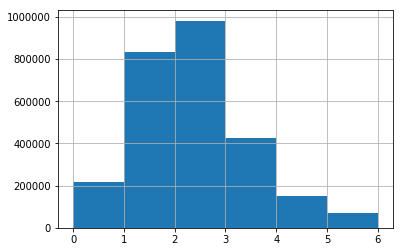

In [7]:
# explanatory analysis
orca.get_table('households').to_frame()['cars'].hist(bins = int(max(orca.get_table('households').to_frame()['cars'])))
# makes sense to create four options: 0-car, 1-car, 2-car, 2+

In [7]:
cars_alt = orca.get_table('households').to_frame()['cars'].apply(lambda x: 0*(x==0)+ 1*(x==1)+2*(x==2)+3*(x>=3))
orca.add_column('households', 'cars_alt', cars_alt)

In [ ]:
bdtype_dummies = pd.get_dummies(df['building_type'].astype(int),prefix='building_type_is')
race_dummies = pd.get_dummies(df['race_of_head'],prefix = 'race')
tenure_dummies = pd.get_dummies(df['tenure'],prefix = 'tenure')
df_corr = df[['persons','cars','income','age_of_head',
              'workers','children','recent_mover','single_family',
              'unit_residential_price','sqft_per_unit','stories','land_value']]
df_corr = pd.concat([df_corr,
    bdtype_dummies,race_dummies,tenure_dummies],
axis = 1)

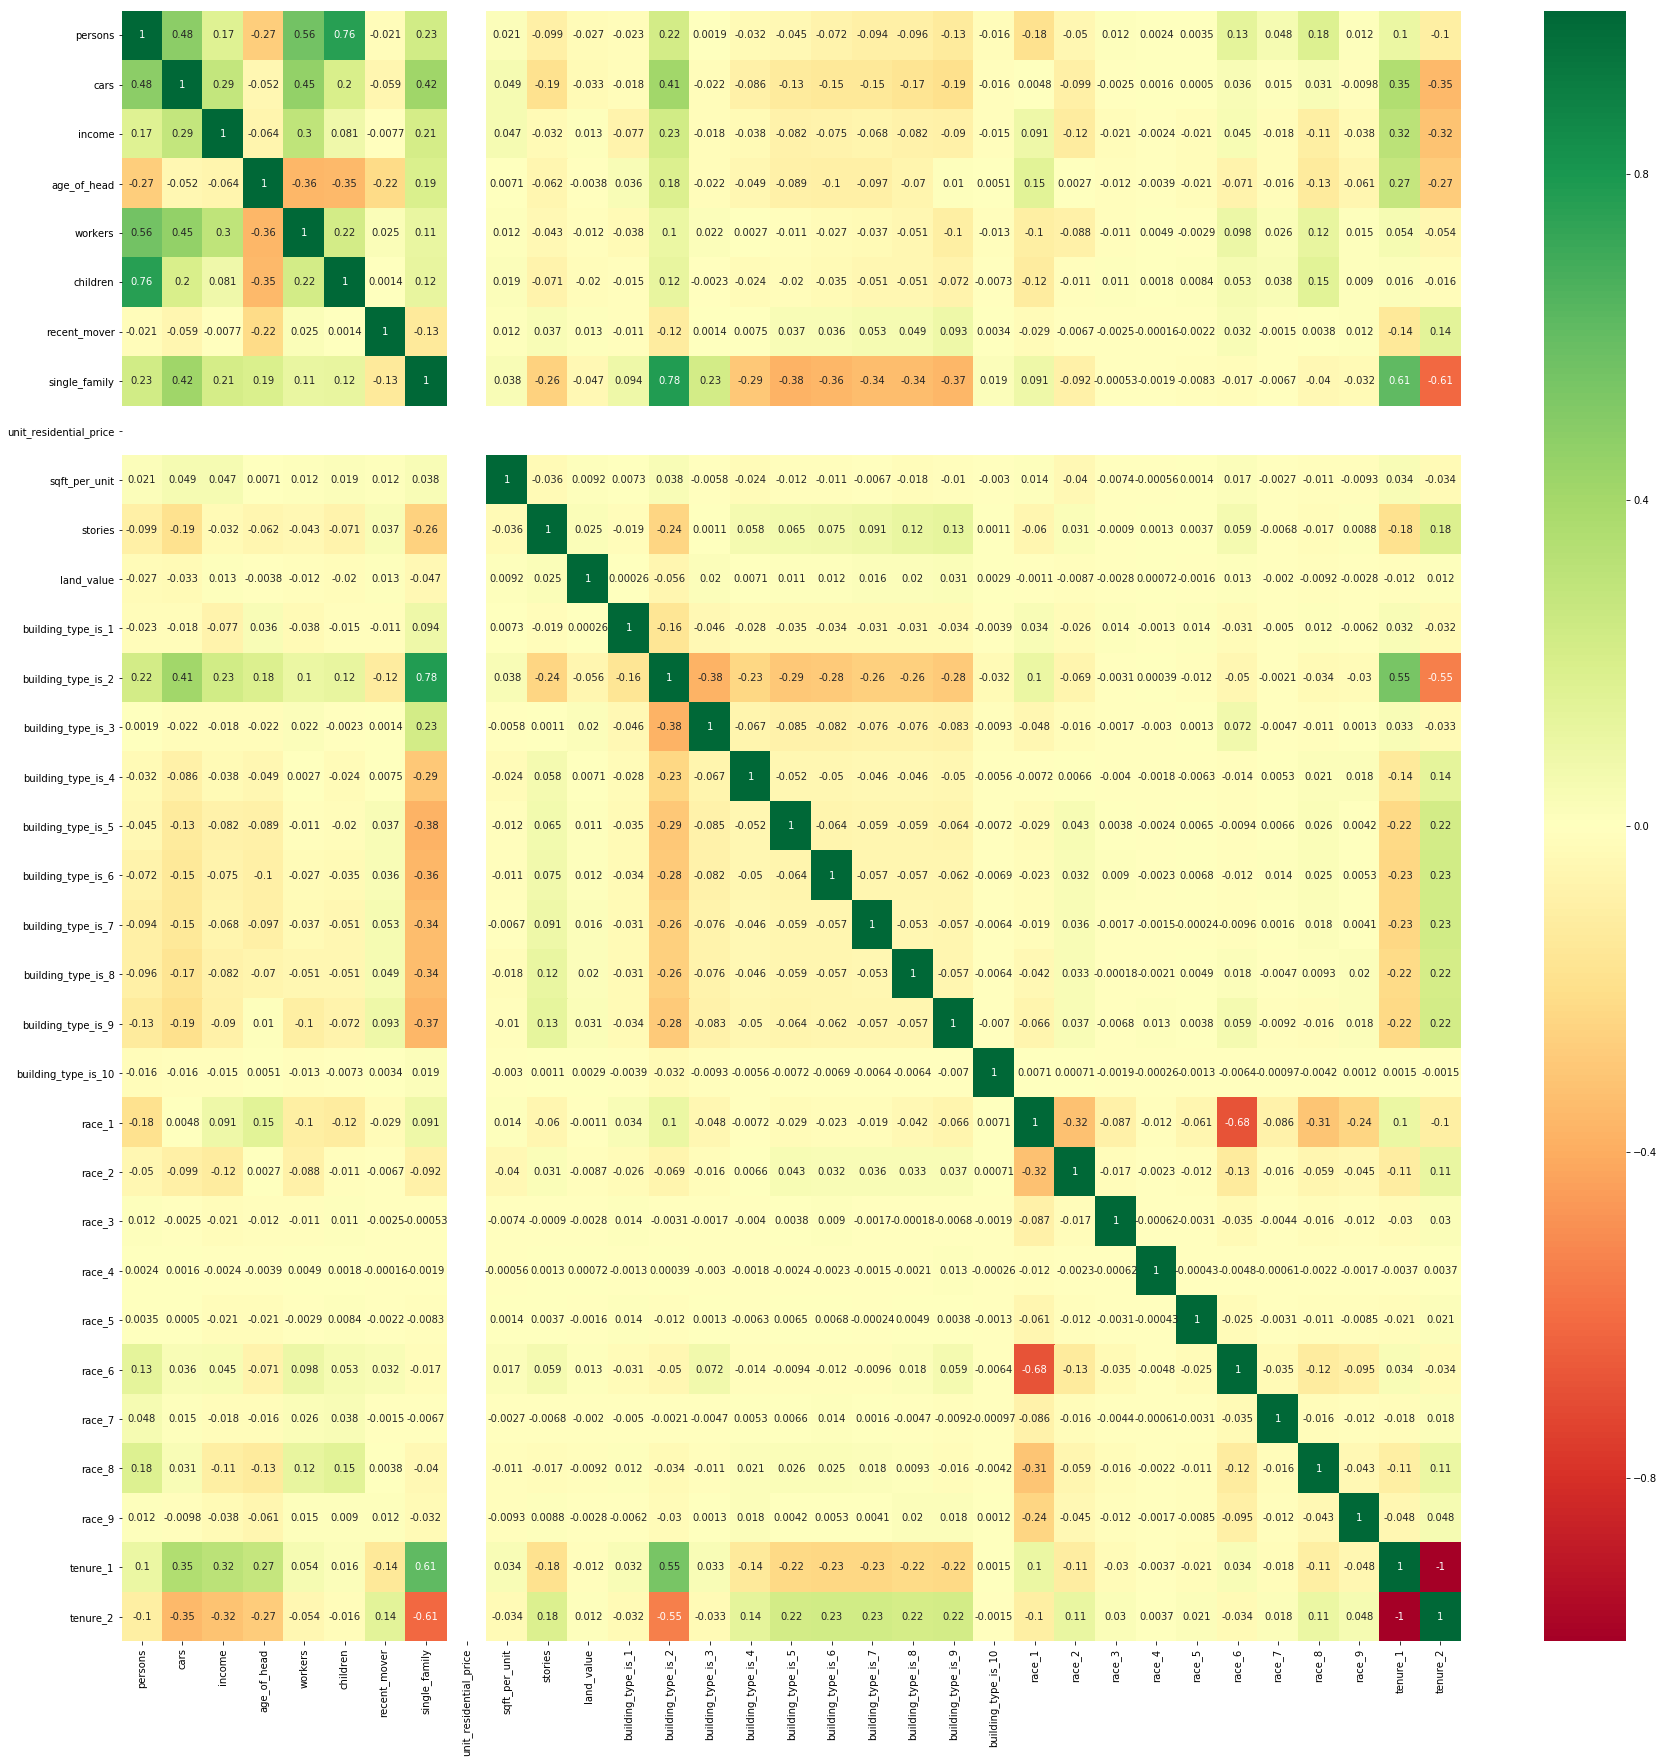

In [27]:
import seaborn as sns
plt.subplots(figsize=(30, 30))
sns.heatmap(df_corr.corr(), annot=True, cmap="RdYlGn")

In [8]:
m = SmallMultinomialLogitStep()
m.name = 'auto_ownership'

In [14]:
m.tables = ['households'
 #         ,'units'  ,'nodessmall','nodeswalk'
           ]
m.choice_column = 'cars_alt'


In [10]:
# log income column
income_log =orca.get_table('households').to_frame()['income'].apply(lambda x:  np.log(x) if x > 0 else 0)

orca.add_column('households', 'income_log', income_log)

# tenure type dummy
orca.add_column('households','tenure_1',(orca.get_table('households').to_frame()['tenure']==1).astype(int))
orca.add_column('households','tenure_2',(orca.get_table('households').to_frame()['tenure']==2).astype(int))
orca.add_column('households','tenure_3',(orca.get_table('households').to_frame()['tenure']==3).astype(int))
orca.add_column('households','tenure_4',(orca.get_table('households').to_frame()['tenure']==4).astype(int))

# single family as integer
orca.add_column('households','single_family_int',(orca.get_table('households').to_frame()['single_family'].astype(int)))

# building type dummy
orca.add_column('households','building_type_2',(orca.get_table('households').to_frame()['building_type']==2).astype(int))

In [16]:
m.model_expression = OrderedDict([
    ('intercept', [1,2,3]),        
    ('income_log', [1,2,3]),
    ('persons', [0,1,2]),
    ('age_of_head',[1,2,3]),
    ('workers',[1,2,3]),
    ('children',[1,2,3]),
    ('single_family_int',[1,2,3]),
    ('tenure_1',[[1,2,3]]),
 #   ('units_500_walk',[0]),
 #   ('pop_500_walk',[0]),
#  ('renters_500_walk',[0]),
 #   ('avg_rent_500',[0]),
 #   ('jobs_500_walk_retail',[0]),

     ])



In [11]:
chooser_ids = orca.get_table('households').to_frame().sample(15000,random_state = 2).index.values # sample 15000 based on household ID
m.filters = ['household_id in [{0}]'.format(','.join(map(str, chooser_ids)))]

In [17]:
m.fit()
#print(m.summary_table)

Log-likelihood at zero: -20,794.4154
Initial Log-likelihood: -20,794.4154
Estimation Time for Point Estimation: 1.82 seconds.
Final log-likelihood: -14,779.5750
                     Multinomial Logit Model Regression Results                    
Dep. Variable:                     _chosen   No. Observations:               15,000
Model:             Multinomial Logit Model   Df Residuals:                   14,978
Method:                                MLE   Df Model:                           22
Date:                     Wed, 26 Sep 2018   Pseudo R-squ.:                   0.289
Time:                             19:32:26   Pseudo R-bar-squ.:               0.288
AIC:                            29,603.150   Log-Likelihood:            -14,779.575
BIC:                            29,770.698   LL-Null:                   -20,794.415
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
m.name = 'auto-ownership'
m.tags = ['auto','auto ownership','jayne','test']
m.register()

In [ ]:
# with accessibility tables [this fails]

In [20]:
m1 = SmallMultinomialLogitStep()
m1.name = 'auto_ownership_acc'

In [ ]:
## m1.tables = ['households'
         ,'units','buildings','parcels','nodessmall','nodeswalk'
            ]
m1.choice_column = 'cars_alt'


In [29]:
m1.model_expression = OrderedDict([
    ('intercept', [1,2,3]),        
    ('income_log', [1,2,3]),
    ('persons', [0,1,2]),
    ('age_of_head',[1,2,3]),
    ('workers',[1,2,3]),
    ('children',[1,2,3]),
    ('single_family_int',[1,2,3]),
    ('tenure_1',[[1,2,3]]),
    ('units_500_walk',[0]),
    ('pop_500_walk',[0]),
    ('renters_500_walk',[0]),
    ('jobs_500_walk_retail',[0]),

     ])



In [23]:
m1.filters = ['household_id in [{0}]'.format(','.join(map(str, chooser_ids)))]

In [48]:
m1.fit()
#print(m.summary_table)

RuntimeError: Not all required columns were found. Missing: ['household_id']

In [39]:
@orca.table(cache=True)
def hh_merged():
    df = orca.merge_tables(target = 'households',tables = ['households','units','buildings','parcels','nodeswalk','nodessmall'])
    return df

In [ ]:
# hh with accessibility tables joined outside the model [this works]

In [40]:
m2 = SmallMultinomialLogitStep()
m2.name = 'auto_ownership_acc2'

In [41]:
m2.tables = ['hh_merged']
m2.choice_column = 'cars_alt'


In [45]:
m2.model_expression = OrderedDict([
    ('intercept', [1,2,3]),        
    ('income_log', [1,2,3]),
    ('persons', [0,1,2]),
    ('age_of_head',[1,2,3]),
    ('workers',[1,2,3]),
    ('children',[1,2,3]),
    ('single_family_int',[1,2,3]),
    ('tenure_1',[[1,2,3]]),
    ('units_500_walk',[1,2,3]),
    ('pop_500_walk',[1,2,3]),
    ('renters_500_walk',[1,2,3]),
    ('jobs_500_walk_retail',[1,2,3]),

     ])



In [43]:
m2.filters = ['household_id in [{0}]'.format(','.join(map(str, chooser_ids)))]

In [46]:
m2.fit()

Log-likelihood at zero: -19,327.7160
Initial Log-likelihood: -19,327.7160
Estimation Time for Point Estimation: 1.22 seconds.
Final log-likelihood: -13,465.0151
                     Multinomial Logit Model Regression Results                    
Dep. Variable:                     _chosen   No. Observations:               13,942
Model:             Multinomial Logit Model   Df Residuals:                   13,908
Method:                                MLE   Df Model:                           34
Date:                     Wed, 26 Sep 2018   Pseudo R-squ.:                   0.303
Time:                             19:48:22   Pseudo R-bar-squ.:               0.302
AIC:                            26,998.030   Log-Likelihood:            -13,465.015
BIC:                            27,254.481   LL-Null:                   -19,327.716
                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [62]:
# Try decision tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf0 = DecisionTreeClassifier(random_state = 0)
df = orca.get_table('hh_merged').to_frame().sample(15000,random_state = 2)



In [75]:
X0 = df[['income_log','persons','age_of_head','workers','children',
         'single_family_int','tenure_1','units_500_walk','pop_500_walk',
        'renters_500_walk','jobs_500_walk_retail'
        ]]
y = df['cars_alt']
cross_val_score(clf0, X0, y, cv=4).mean()

0.5263991129883814

In [100]:
# use more features
X1 = df[['income_log','persons','age_of_head','workers','children',
          'single_family_int','tenure_1','building_type_2','stories',
    #     'units_500_walk','pop_500_walk',
    #    'renters_500_walk',
        ]
    #    + list(orca.get_table('nodessmall').to_frame().columns) 
    #   + list(orca.get_table('nodeswalk').to_frame().columns)
        ]
cross_val_score(clf0, X1, y, cv=4).mean()

0.5535302260288161